In [33]:
import pyspark as ps

spark = ps.sql.SparkSession.builder \
            .master("local[2]") \
            .appName("NFL") \
            .getOrCreate()

sc = spark.sparkContext 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 

In [34]:
# read CSV
teams = spark.read.csv('../data/wlrate.csv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep=",",           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

# prints the schema
teams.printSchema()

# some functions are still valid
print("line count: {}".format(teams.count()))


root
 |-- Tm: string (nullable = true)
 |-- From: integer (nullable = true)
 |-- To: integer (nullable = true)
 |-- W: integer (nullable = true)
 |-- L: integer (nullable = true)
 |-- T: integer (nullable = true)
 |-- Rate: double (nullable = true)
 |-- AV: string (nullable = true)
 |-- Passer: string (nullable = true)
 |-- Rusher: string (nullable = true)
 |-- Receiver: string (nullable = true)
 |-- Coaching: string (nullable = true)
 |-- Yr plyf: integer (nullable = true)
 |-- W plyf: integer (nullable = true)
 |-- L plyf: integer (nullable = true)
 |-- Rate2: double (nullable = true)
 |-- Chmp: integer (nullable = true)
 |-- SBwl: integer (nullable = true)
 |-- Conf: integer (nullable = true)
 |-- Div: integer (nullable = true)

line count: 32


In [35]:
teams.createOrReplaceTempView("teams")
teams=teams.toPandas()

In [36]:
# Drop unnecessary columns and change column name 'Tm' to "Team"
teams = teams[['Tm', 'From','Rate']]
teams = teams.rename(columns={'Tm':'Team'})
teams.to_csv('../data/list.csv')
teams.head()

,Team,From,Rate
0,Arizona Cardinals,1920,0.424
1,Atlanta Falcons,1966,0.440
2,Baltimore Ravens,1996,0.563
3,Buffalo Bills,1960,0.469
4,Carolina Panthers,1995,0.489


In [37]:
# What are the top 5 teams? 

top5 = spark.sql('''
    SELECT Tm, From, To, Rate
    FROM teams
    ORDER BY 4 DESC
    LIMIT 5
    ''')
top5.show()
top5 = top5.toPandas()

+--------------------+----+----+-----+
|                  Tm|From|  To| Rate|
+--------------------+----+----+-----+
|      Dallas Cowboys|1960|2020|0.571|
|   Green Bay Packers|1921|2020|0.569|
|       Chicago Bears|1920|2020|0.567|
|New England Patriots|1960|2020|0.564|
|    Baltimore Ravens|1996|2020|0.563|
+--------------------+----+----+-----+



In [38]:
# What are the bottom 5 teams? 

bottom5 = spark.sql('''
    SELECT Tm, From, To, Rate
    FROM teams
    ORDER BY 4 ASC
    LIMIT 5
    ''')
bottom5.show()
bottom5 = bottom5.toPandas()

+--------------------+----+----+-----+
|                  Tm|From|  To| Rate|
+--------------------+----+----+-----+
|Tampa Bay Buccaneers|1976|2020|0.389|
|   Arizona Cardinals|1920|2020|0.424|
|Jacksonville Jaguars|1995|2020|0.436|
|     Atlanta Falcons|1966|2020| 0.44|
|  Cincinnati Bengals|1968|2020|0.447|
+--------------------+----+----+-----+



In [39]:
asclist = spark.sql('''
    SELECT Tm, From , Rate
    FROM teams
    ORDER BY 3 ASC
    ''')
asclist = asclist.toPandas()
asclist
asclist["Conference"] = ["NFC South", "NFC West", "AFC South", "NFC South", 
                        "AFC North", "AFC East", "AFC South", "NFC North", "NFC South", "AFC East",
                        "AFC South", "NFC South", "NFC East", "AFC West", "NFC East", "NFC West",
                        "AFC North", "NFC West", "AFC West", "AFC South", "AFC West", "NFC East", "AFC West",
                        "AFC North", "NFC West", "NFC North", "AFC East", "AFC North", "AFC East", "NFC North",
                        "NFC North", "NFC East"]

NFC_South = asclist[asclist["Conference"]=="NFC South"]
NFC_North = asclist[asclist["Conference"]=="NFC North"]
NFC_East = asclist[asclist["Conference"]=="NFC East"]
NFC_West = asclist[asclist["Conference"]=="NFC West"]

AFC_South = asclist[asclist["Conference"]=="AFC South"]
AFC_North = asclist[asclist["Conference"]=="AFC North"]
AFC_East = asclist[asclist["Conference"]=="AFC East"]
AFC_West = asclist[asclist["Conference"]=="AFC West"]

AFC_South

,Tm,From,Rate,Conference
2,Jacksonville Jaguars,1995,0.436,AFC South
6,Houston Texans,2002,0.449,AFC South
10,Tennessee Titans,1960,0.486,AFC South
19,Indianapolis Colts,1953,0.529,AFC South


In [40]:
team_list = asclist[["Tm", "Rate"]]

In [41]:
top5

,Tm,From,To,Rate
0,Dallas Cowboys,1960,2020,0.571
1,Green Bay Packers,1921,2020,0.569
2,Chicago Bears,1920,2020,0.567
3,New England Patriots,1960,2020,0.564
4,Baltimore Ravens,1996,2020,0.563


In [42]:
bottom5

,Tm,From,To,Rate
0,Tampa Bay Buccaneers,1976,2020,0.389
1,Arizona Cardinals,1920,2020,0.424
2,Jacksonville Jaguars,1995,2020,0.436
3,Atlanta Falcons,1966,2020,0.440
4,Cincinnati Bengals,1968,2020,0.447


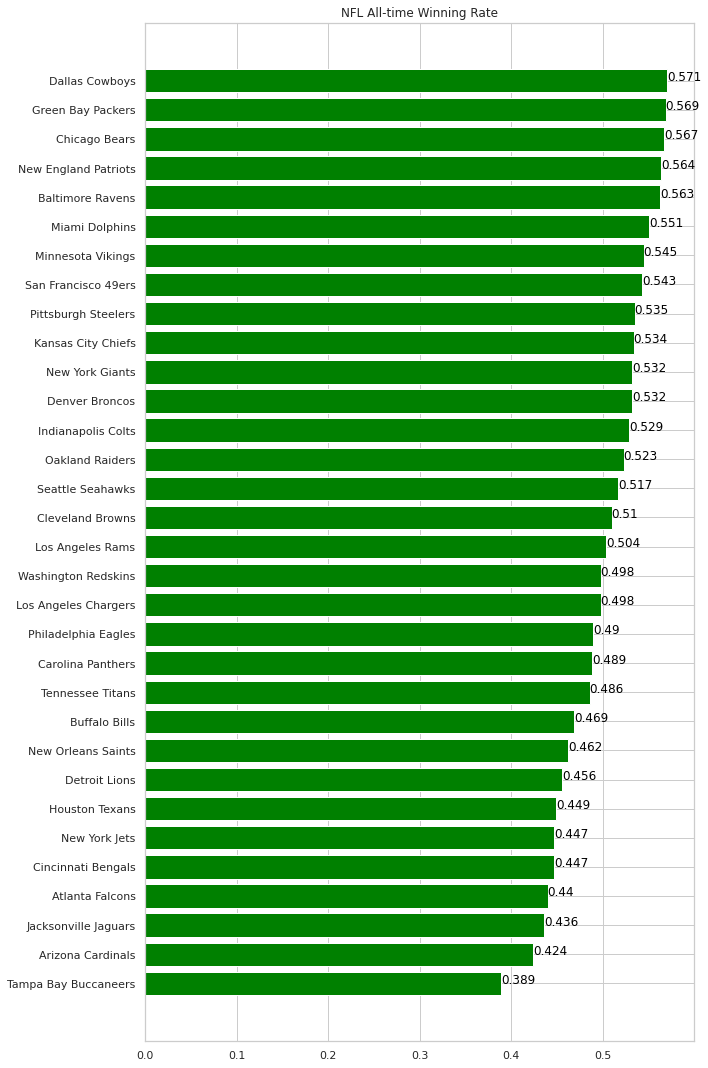

In [43]:
# List of Teams Order by Winning Rate
fig, ax = plt.subplots(1, figsize= (10,15))
ax = plt.barh(y = asclist['Tm'],  width= asclist['Rate'], height = 0.8 ,  color = 'green')
plt.title("NFL All-time Winning Rate")
for i,v in enumerate(asclist['Rate']):
    plt.text(v, i, str(v), color ='black')
  
plt.tight_layout()

fig.savefig("../img/NFL_WinningRate.png")

In [44]:
os.getcwd()

'/home/jovyan/work/Desktop/gNYC13/capstone1/src'

In [45]:
os.chdir('../src')
os.getcwd()

'/home/jovyan/work/Desktop/gNYC13/capstone1/src'

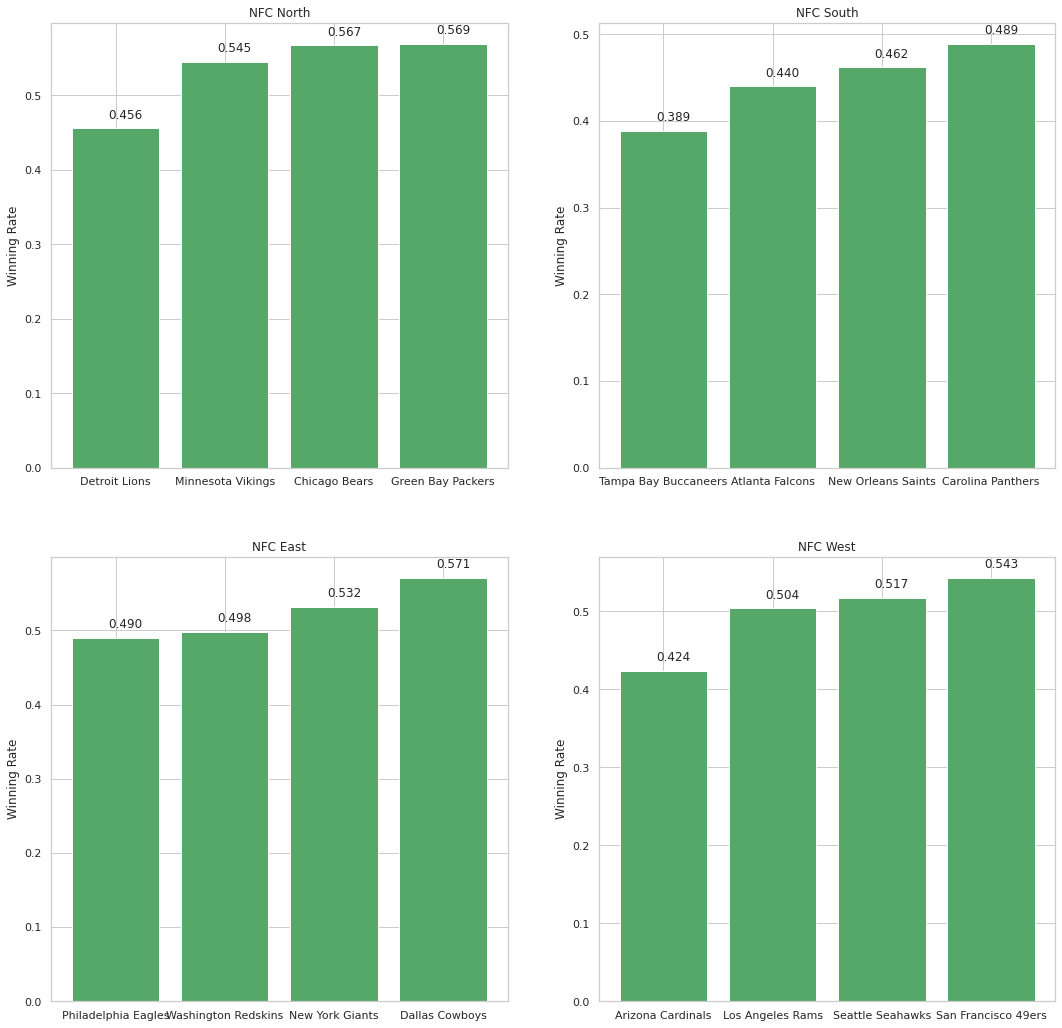

In [46]:
fig = plt.figure(figsize = (18,18))


plt.subplot(2,2,1)
plt.bar(x= NFC_North["Tm"] , height = NFC_North["Rate"], color = 'g')
for x,y in zip(NFC_North["Tm"],NFC_North["Rate"]):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), textcoords ="offset points", xytext=(10,10), ha = "center")
plt.ylabel("Winning Rate")
plt.title("NFC North")

plt.subplot(2,2,2)
plt.bar(x= NFC_South["Tm"] , height = NFC_South["Rate"], color = 'g')
for x,y in zip(NFC_South["Tm"],NFC_South["Rate"]):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), textcoords ="offset points", xytext=(10,10), ha = "center")
plt.ylabel("Winning Rate")
plt.title("NFC South")

plt.subplot(2,2,3)
plt.bar(x= NFC_East["Tm"] , height = NFC_East["Rate"], color = 'g')
for x,y in zip(NFC_East["Tm"],NFC_East["Rate"]):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), textcoords ="offset points", xytext=(10,10), ha = "center")
plt.ylabel("Winning Rate")
plt.title("NFC East")

plt.subplot(2,2,4)
plt.bar(x= NFC_West["Tm"] , height = NFC_West["Rate"], color = 'g')
for x,y in zip(NFC_West["Tm"],NFC_West["Rate"]):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), textcoords ="offset points", xytext=(10,10), ha = "center")
plt.ylabel("Winning Rate")
plt.title("NFC West")

plt.savefig("../img/NFC_WinningRate")

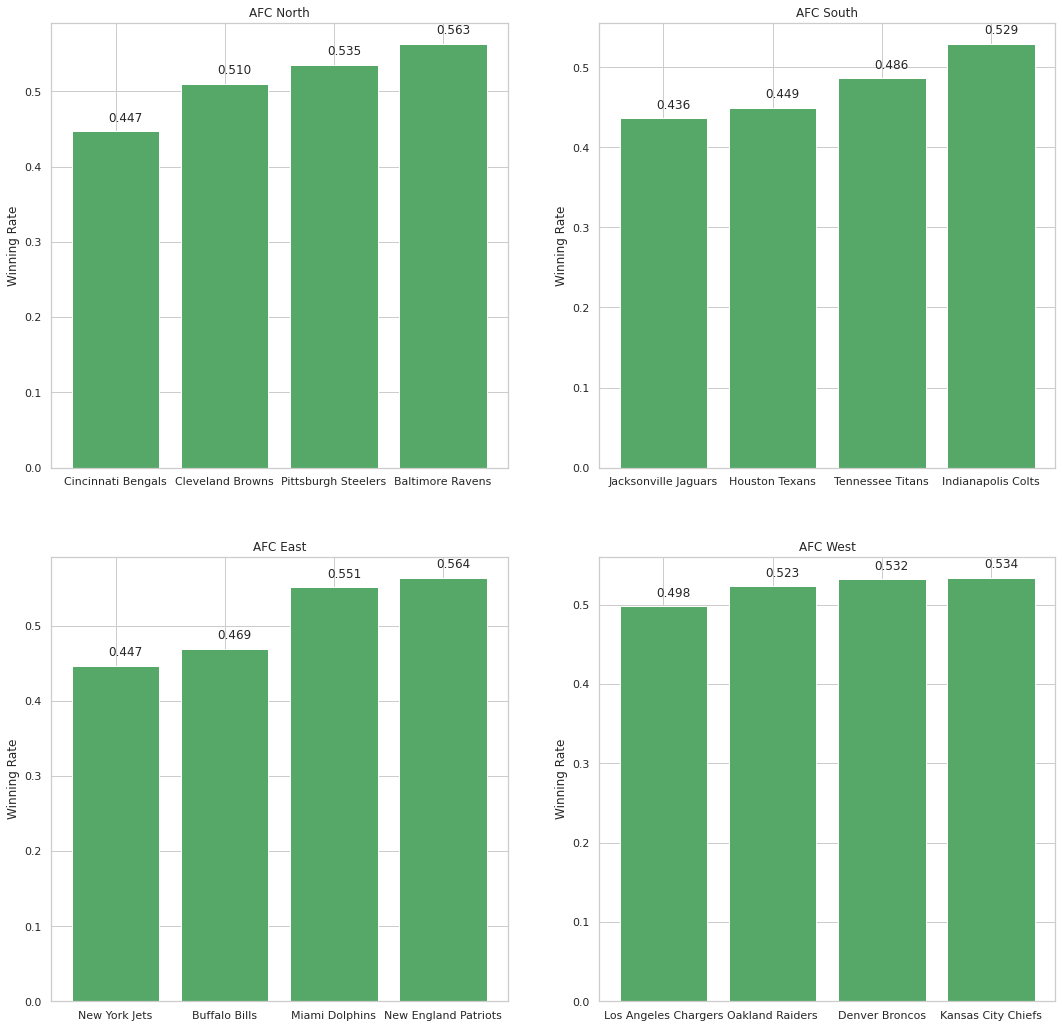

In [47]:
fig = plt.figure(figsize = (18,18))


plt.subplot(2,2,1)
plt.bar(x= AFC_North["Tm"] , height = AFC_North["Rate"], color = 'g')
for x,y in zip(AFC_North["Tm"],AFC_North["Rate"]):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), textcoords ="offset points", xytext=(10,10), ha = "center")
plt.ylabel("Winning Rate")
plt.title("AFC North")

plt.subplot(2,2,2)
plt.bar(x= AFC_South["Tm"] , height = AFC_South["Rate"], color = 'g')
for x,y in zip(AFC_South["Tm"],AFC_South["Rate"]):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), textcoords ="offset points", xytext=(10,10), ha = "center")
plt.ylabel("Winning Rate")
plt.title("AFC South")

plt.subplot(2,2,3)
plt.bar(x= AFC_East["Tm"] , height = AFC_East["Rate"], color = 'g')
for x,y in zip(AFC_East["Tm"],AFC_East["Rate"]):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), textcoords ="offset points", xytext=(10,10), ha = "center")
plt.ylabel("Winning Rate")
plt.title("AFC East")

plt.subplot(2,2,4)
plt.bar(x= AFC_West["Tm"] , height = AFC_West["Rate"], color = 'g')
for x,y in zip(AFC_West["Tm"],AFC_West["Rate"]):
    label = "{:.3f}".format(y)
    plt.annotate(label,(x,y), textcoords ="offset points", xytext=(10,10), ha = "center")
plt.ylabel("Winning Rate")
plt.title("AFC West")


plt.savefig("../img/AFC_WinningRate")

In [48]:
high_low = asclist.iloc[[0,-1]][['Tm','Rate']]
high_low = high_low.rename(columns={"Tm":"Team","Rate":"Winning Rate"})


<AxesSubplot:xlabel='Team', ylabel='Winning Rate'>

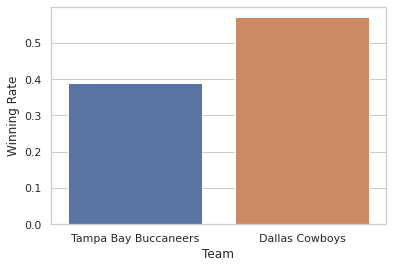

In [51]:
fig, ax1 = plt.subplots()
sns.set_theme(style="whitegrid")
sns.barplot(data = high_low, x = "Team", y = "Winning Rate")
